<a href="https://colab.research.google.com/github/Yash1392/AIDS_demo/blob/master/iGnosis_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [19]:
# Load datasets
transaction_data = pd.read_csv("/content/transaction_data.csv")
purchase_behaviour = pd.read_csv("/content/purchase_behaviour.csv")

In [20]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [21]:
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [22]:
# Merge both datasets on LYLTY_CARD_NBR
data = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR")

In [23]:
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [24]:
# Aggregate customer spending and transactions
customer_summary = data.groupby("LYLTY_CARD_NBR").agg({
    "TOT_SALES": "sum",  # Total spending per customer
    "TXN_ID": "count"     # Total transactions per customer
}).rename(columns={"TOT_SALES": "Total_Spending", "TXN_ID": "Transaction_Count"})

In [25]:
customer_summary

,Total_Spending,Transaction_Count
LYLTY_CARD_NBR,,
1000,6.0,1
1002,2.7,1
1003,6.6,2
1004,1.9,1
1005,2.8,1
...,...,...
2370651,13.0,1
2370701,7.2,1
2370751,9.2,1


In [26]:
# Merge with customer demographics
data = customer_summary.merge(purchase_behaviour, on="LYLTY_CARD_NBR")

In [27]:
data

,LYLTY_CARD_NBR,Total_Spending,Transaction_Count,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,6.0,1,YOUNG SINGLES/COUPLES,Premium
1,1002,2.7,1,YOUNG SINGLES/COUPLES,Mainstream
2,1003,6.6,2,YOUNG FAMILIES,Budget
3,1004,1.9,1,OLDER SINGLES/COUPLES,Mainstream
4,1005,2.8,1,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...,...,...
72632,2370651,13.0,1,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,7.2,1,YOUNG FAMILIES,Mainstream
72634,2370751,9.2,1,YOUNG FAMILIES,Premium
72635,2370961,18.6,2,OLDER FAMILIES,Budget


In [28]:
# Encode categorical variables
encoded_data = pd.get_dummies(data, columns=["LIFESTAGE", "PREMIUM_CUSTOMER"], drop_first=True)

In [29]:
encoded_data

,LYLTY_CARD_NBR,Total_Spending,Transaction_Count,LIFESTAGE_NEW FAMILIES,LIFESTAGE_OLDER FAMILIES,LIFESTAGE_OLDER SINGLES/COUPLES,LIFESTAGE_RETIREES,LIFESTAGE_YOUNG FAMILIES,LIFESTAGE_YOUNG SINGLES/COUPLES,PREMIUM_CUSTOMER_Mainstream,PREMIUM_CUSTOMER_Premium
0,1000,6.0,1,False,False,False,False,False,True,False,True
1,1002,2.7,1,False,False,False,False,False,True,True,False
2,1003,6.6,2,False,False,False,False,True,False,False,False
3,1004,1.9,1,False,False,True,False,False,False,True,False
4,1005,2.8,1,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
72632,2370651,13.0,1,False,False,False,False,False,False,True,False
72633,2370701,7.2,1,False,False,False,False,True,False,True,False
72634,2370751,9.2,1,False,False,False,False,True,False,False,True
72635,2370961,18.6,2,False,True,False,False,False,False,False,False


In [30]:
# Standardize numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(encoded_data.drop(columns=["LYLTY_CARD_NBR"]))

In [31]:
data_scaled

array([[-0.99121181, -1.00605183, -0.19070544, ...,  2.00746478,
        -0.82095807,  1.68486175],
       [-1.14975756, -1.00605183, -0.19070544, ...,  2.00746478,
         1.218089  , -0.59352051],
       [-0.96238531, -0.62583868, -0.19070544, ..., -0.49814075,
        -0.82095807, -0.59352051],
       ...,
       [-0.83747048, -1.00605183, -0.19070544, ..., -0.49814075,
        -0.82095807,  1.68486175],
       [-0.38585531, -0.62583868, -0.19070544, ..., -0.49814075,
        -0.82095807, -0.59352051],
       [-0.73177331, -1.00605183, -0.19070544, ...,  2.00746478,
         1.218089  , -0.59352051]])

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(data_scaled)

In [33]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [34]:
# Analyze cluster characteristics
cluster_summary = data.groupby("Cluster").agg({
    "Total_Spending": "mean",  # Mean of Total Spending for each cluster
    "Transaction_Count": "mean" # Mean of Transaction Count for each cluster
    # Add other numeric columns you want to analyze
})
print(cluster_summary)

         Total_Spending  Transaction_Count
Cluster                                   
0             16.486578           2.320810
1             36.741556           4.969387
2             19.785583           2.714398


In [35]:
top_products = (transaction_data.groupby(["PROD_NBR", "PROD_NAME"]).agg({"TOT_SALES": "sum"})
                .sort_values(by="TOT_SALES", ascending=False).head(3))
print(top_products)

                                                   TOT_SALES
PROD_NBR PROD_NAME                                          
4        Dorito Corn Chp     Supreme 380g            40352.0
14       Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
16       Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


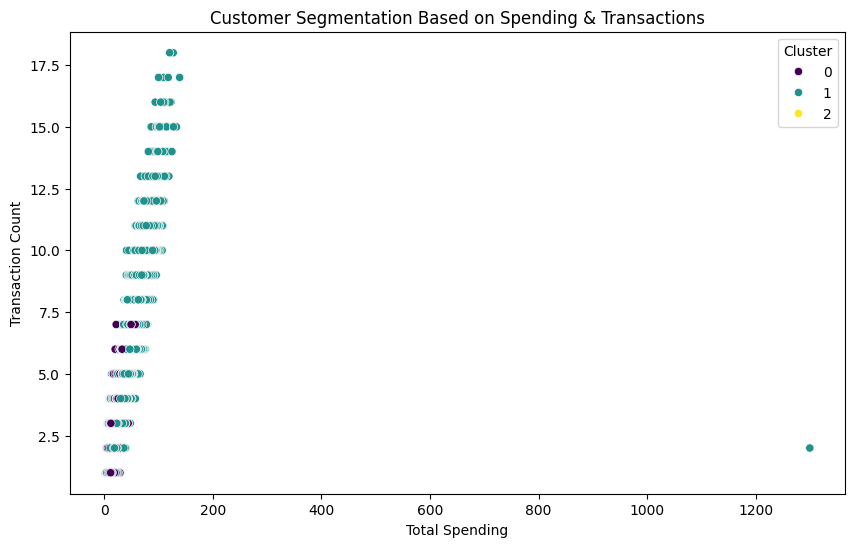

In [13]:
# Visualize customer clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Total_Spending"], y=data["Transaction_Count"], hue=data["Cluster"], palette="viridis")
plt.title("Customer Segmentation Based on Spending & Transactions")
plt.xlabel("Total Spending")
plt.ylabel("Transaction Count")
plt.show()

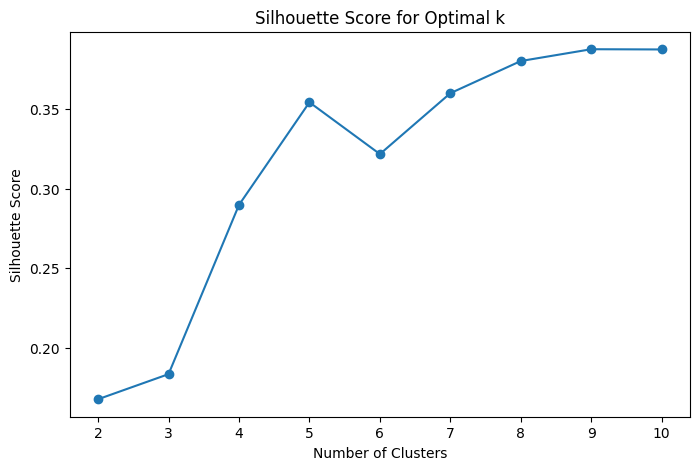

Optimal Number of Clusters: 9

Cluster Summary:
   Cluster  Total_Spending  Transaction_Count
0        0       62.593617           8.508200
1        1       23.669519           3.211838
2        2       26.916858           3.645480
3        3       17.256857           2.415994
4        4       15.302674           2.161227
5        5       19.785583           2.714398
6        6       23.790936           3.248060
7        7       58.243084           7.966764
8        8       16.379136           2.301158

Top 3 Products:
                                                   TOT_SALES
PROD_NBR PROD_NAME                                          
4        Dorito Corn Chp     Supreme 380g            40352.0
14       Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
16       Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


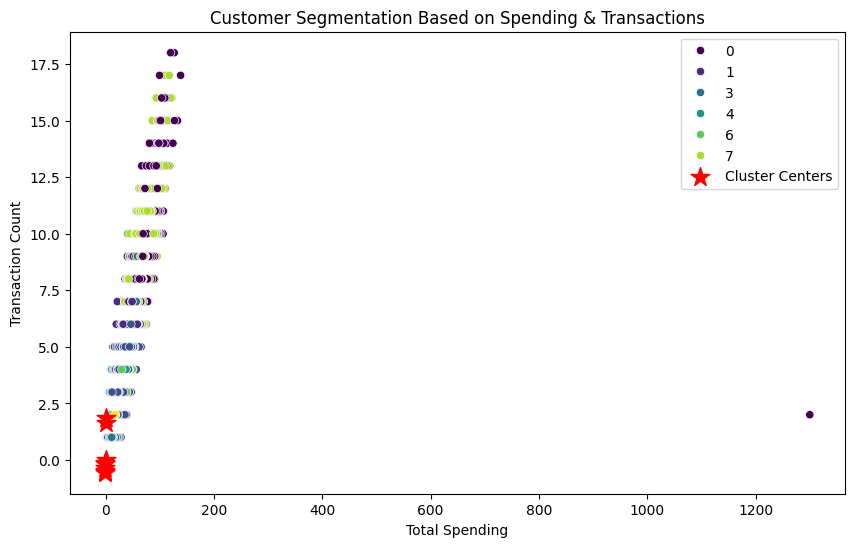

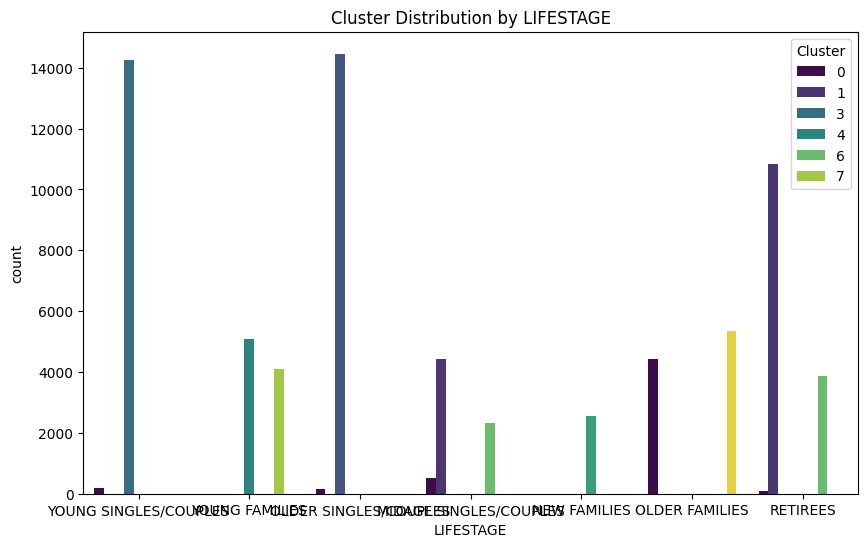

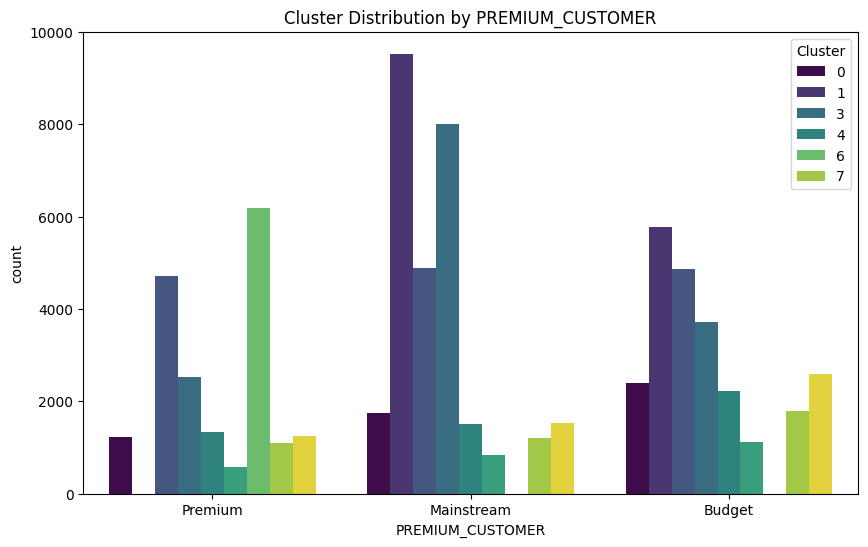

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load datasets
transaction_data = pd.read_csv("/content/transaction_data.csv")
purchase_behaviour = pd.read_csv("/content/purchase_behaviour.csv")

# Merge both datasets on LYLTY_CARD_NBR
data = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR")

# Aggregate customer spending and transactions
customer_summary = data.groupby("LYLTY_CARD_NBR").agg({
    "TOT_SALES": "sum",
    "TXN_ID": "count"
}).rename(columns={"TOT_SALES": "Total_Spending", "TXN_ID": "Transaction_Count"})

# Merge with customer demographics
data = customer_summary.merge(purchase_behaviour, on="LYLTY_CARD_NBR")

# Encode categorical variables
encoded_data = pd.get_dummies(data, columns=["LIFESTAGE", "PREMIUM_CUSTOMER"], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(encoded_data.drop(columns=["LYLTY_CARD_NBR"]))


# Find optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # explicitly set n_init
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to find optimal k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Get optimal number of clusters
optimal_k = range(2,11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters: {optimal_k}")

# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # explicitly set n_init
data["Cluster"] = kmeans.fit_predict(data_scaled)

# Analyze cluster characteristics
cluster_summary = data.groupby("Cluster").agg({
    "Total_Spending": "mean",
    "Transaction_Count": "mean"
}).reset_index()


print("\nCluster Summary:")
print(cluster_summary)

# Get top 3 products
top_products = (transaction_data.groupby(["PROD_NBR", "PROD_NAME"]).agg({"TOT_SALES": "sum"})
                .sort_values(by="TOT_SALES", ascending=False).head(3))
print("\nTop 3 Products:")
print(top_products)

# Visualize customer clusters with cluster centers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Total_Spending"], y=data["Transaction_Count"], hue=data["Cluster"], palette="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c='red', label='Cluster Centers')
plt.title("Customer Segmentation Based on Spending & Transactions")
plt.xlabel("Total Spending")
plt.ylabel("Transaction Count")
plt.legend()
plt.show()

# Visualize cluster distributions
for column in ["LIFESTAGE", "PREMIUM_CUSTOMER"]:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue="Cluster", data=data, palette="viridis")
    plt.title(f"Cluster Distribution by {column}")
    plt.show()
